<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/11SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use SVM instead of KNN
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [22]:

# Download 10 years of Gold Fields stock data
ticker = "GFI.JO"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")

# Keep required features (including Volume)
df = data[['Close', 'High', 'Low', 'Open', 'Volume']].copy()

# Create target variable: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop last row (since it has no next day target)
df = df.dropna()

df.tail()

/tmp/ipython-input-2647355421.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Target
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,
Date,,,,,,
2024-12-20,25710.158203,25726.155191,24762.336699,25351.225798,5006397,0
2024-12-23,24765.335938,25806.139923,24680.351943,25310.233317,1293370,1
2024-12-24,25406.214844,25571.183773,24765.335551,25085.275291,334453,0
2024-12-27,25074.277344,25918.118409,24735.341181,25105.271506,817916,0
2024-12-30,24805.328125,25098.272951,24517.382357,24827.323982,1012028,0


In [23]:

# Split train (2013-01-01 to 2023-12-31) and test (2024-01-01 to 2024-12-31)
train_df = df.loc["2013-01-01":"2023-12-31"]
test_df  = df.loc["2024-01-01":"2024-12-31"]

# Features and target
X_train = train_df[['Close', 'High', 'Low', 'Open', 'Volume']]
y_train = train_df['Target']
X_test  = test_df[['Close', 'High', 'Low', 'Open', 'Volume']]
y_test  = test_df['Target']


In [24]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Define SVM with class weight adjustment
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')

# Fit the model
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, class_weight='balanced')

Confusion Matrix:
 [[110   5]
 [123  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.96      0.63       115
           1       0.69      0.08      0.15       134

    accuracy                           0.49       249
   macro avg       0.58      0.52      0.39       249
weighted avg       0.59      0.49      0.37       249

Accuracy: 0.4859437751004016


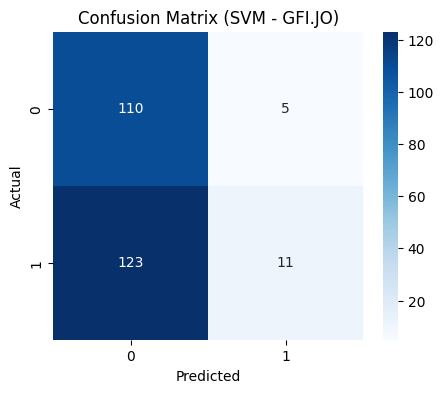

In [26]:
# Predict on test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (SVM - GFI.JO)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Target
0    0.516613
1    0.483387
Name: proportion, dtype: float64
Target
1    0.538153
0    0.461847
Name: proportion, dtype: float64


#new

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Download 10 years of Gold Fields stock data
ticker = "GFI.JO"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")

# Keep OHLCV features
df = data[['Close', 'High', 'Low', 'Open', 'Volume']].copy()

# Target: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Feature engineering
df['Return'] = df['Close'].pct_change()
df['SMA10'] = df['Close'].rolling(10).mean()
df['High_Low'] = df['High'] / df['Low']
df['Close_Open'] = df['Close'] / df['Open']
df['Volatility'] = df['Return'].rolling(20).std()

# Drop NaN rows
df = df.dropna()


/tmp/ipython-input-3093812493.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [30]:
# Train (2013–2023) and Test (2024)
train_df = df.loc["2013-01-01":"2023-12-31"]
test_df = df.loc["2024-01-01":"2024-12-31"]

features = ['Close','High','Low','Open','Volume',
            'Return','SMA10','High_Low','Close_Open','Volatility']

X_train = train_df[features]
y_train = train_df['Target']
X_test = test_df[features]
y_test = test_df['Target']


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Grid search with cross-validation
grid = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Score: 0.5192520578132089


In [35]:
best_svm = grid.best_estimator_

# Train on full training data
best_svm.fit(X_train_scaled, y_train)

# Predict
y_pred = best_svm.predict(X_test_scaled)


Confusion Matrix:
 [[113   2]
 [132   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.98      0.63       115
           1       0.50      0.01      0.03       134

    accuracy                           0.46       249
   macro avg       0.48      0.50      0.33       249
weighted avg       0.48      0.46      0.31       249

Accuracy: 0.46184738955823296


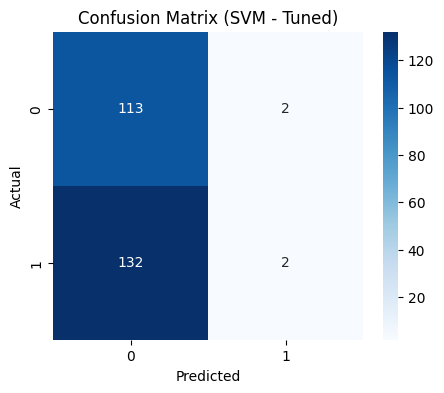

In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (SVM - Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
